# Fourier Optics Numeric Homework #1 - The FFT

## Author: Mark Brown

## Date: 16-09-08

## Entire Assigment Statement

Numerical HW 1: The FFT
The FFT algorithm implements the discrete Fourier transform in a particularly efficient manner.  This efficiency requires a specific choice of coordinate system in the real and frequency domains.  This HW will help you establish those coordinate systems and validate the relationship of the DFT to the continuous Fourier transform by validation of various transform pairs and rules.  You may find it helpful to read the Wikipedia page on the discrete Fourier transform (DFT).                    
1. Create the coordinate system.    The FFT requires the origin (x and fx = 0) to be the first element in the array, followed by all the positive coordinates (x and $f_x > 0$) up to Nyquist, then followed by all the negatives coordinates (x and fx < 0) starting at the largest and ending at the smallest in magnitude.   Create an array of an array test=0:15, then apply fftshift and note where you now find the origin (0).  Apply ifftshift to the result of fftshift and note that they are inverse operations.   Now that you see how these work, create an array x with Nx samples and spacing dx, placing the origin x=0 in the proper location such that ifftshift(x) has the origin as the first element.  Use x to define an electric field vs x via a command like $e =1.0*( abs(x)<\frac{L}{2})$  which assigns e to be a rect of width L and amplitude 1.  Take the Fourier transform of e via E=fft(ifftshift(e))  and examine the results.  Define an array fx with the same layout as x (origin at the same index) and figure out how to make a plot of the Fourier transform of E vs. this fx with the origin at the center of the plot, just like e(x).  Hint: You will be using fftshift and ifftshift a silly number of times.          
2. Confirm your understanding (and the coordinate system).  You should now have two coordinate arrays x and fx and two E field arrays e and E that are functions of the coordinate arrays.  Execute the following transforms and check your results by over-plotting the continuous transform results.  NOTE:  This is best practice for all following numerical HW problems – if you can solve the problem analytically, then plot the analytic and numerical results on the same graph to validate your code.  Insure the results are accurate at the scale of the sampling grid (that is, if you expect a delta function at x=0, insure it is exactly at x=0) and verify the sign of the phase.        
	1. $e(x) = 1$ for all x.  Note and explain the amplitude of the discrete Fourier transform.
	- $e(x) = \delta\{x\}$.  Again, comment on the amplitude of the discrete Fourier transform.    
	- $E(f_x) = \delta\{f_x - df_x\}$ where dfx is the sample spacing of fx.  Plot and comment on the phase of E(x). 
	- $e(x) = \cos{\{\frac{2 \pi x}{\lambda}\}}$ where Lambda is chosen to give you exactly 4 periods across the entire x grid.  Hint: You must choose the number of cells in your grid Nx properly for this constraint to be possible.   The result should be exactly what you would predict from the continuous Fourier transform.
	- The same as (d) but let Lambda be increased by a single cell width dx.  
What do (d) and (e) say about the boundary conditions of the FFT?  What is the mathematical origin of this boundary condition?  What is the boundary condition in frequency space?  How does this relate to the concept of "aliasing?"

## Imports

In [1]:

import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import scipy.fftpack as FT
import math as m
import sys
%matplotlib inline


## Matplotlib Defaults

In [2]:
# set matplotlib plot defaults :D
# These values are nice for a dark theme.
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['text.color'] = '#ffffff'
mpl.rcParams['figure.edgecolor'] = '#ffffff'
mpl.rcParams['xtick.color'] = '#ffffff'
mpl.rcParams['ytick.color'] = '#ffffff'
mpl.rcParams['figure.facecolor'] = '#000000'
mpl.rcParams['axes.facecolor'] = '#0a0a0a'
mpl.rcParams['figure.figsize'] = (18.0, 8.0)
mpl.rcParams['axes.labelcolor'] = '#ffffff'
mpl.rcParams['grid.color'] = '#aaaaff'
mpl.rcParams['axes.edgecolor'] = '#ffffff'
mpl.rcParams['legend.facecolor'] = '#0a0a0a'
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.formatter.useoffset'] = False

# Problem #1

## Problem Statement

1. Create the coordinate system.    The FFT requires the origin (x and fx = 0) to be the first element in the array, followed by all the positive coordinates (x and $f_x > 0$) up to Nyquist, then followed by all the negatives coordinates (x and fx < 0) starting at the largest and ending at the smallest in magnitude.   Create an array of an array test=0:15, then apply fftshift and note where you now find the origin (0).  Apply ifftshift to the result of fftshift and note that they are inverse operations.   Now that you see how these work, create an array x with Nx samples and spacing dx, placing the origin x=0 in the proper location such that ifftshift(x) has the origin as the first element.  Use x to define an electric field vs x via a command like $e =1.0*( \text{abs}\{x\}<\frac{L}{2})$  which assigns e to be a rect of width L and amplitude 1.  Take the Fourier transform of e via E=fft(ifftshift(e))  and examine the results.  Define an array fx with the same layout as x (origin at the same index) and figure out how to make a plot of the Fourier transform of E vs. this fx with the origin at the center of the plot, just like e(x).  Hint: You will be using fftshift and ifftshift a silly number of times.          

## Problem Work

In [10]:
# Doing the test to see how these shift functions work.
test = np.array(range(0,16))
shiftedTest = FT.fftshift(test)
shiftAndBackTest = FT.ifftshift(shiftedTest)
print('test: ' + str(test))
print('After Shift: ' + str(shiftedTest))
print('After Reverse: ' + str(shiftAndBackTest))

test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
After Shift: [ 8  9 10 11 12 13 14 15  0  1  2  3  4  5  6  7]
After Reverse: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


fftshift takes my array and puts 0 in the middle, with the negaive numbers first.  
ifftshift appears to reverse the fftshift function, as expected, giving me back my original array.

In [81]:
# "front-end" Parameters. (other paremeters are determined in terms of this)
numberOfPoints = 2**8
triangleLength = 1
dataRange = 8 * triangleLength
# ###
spacing = dataRange / (numberOfPoints-1)
xData = np.linspace(-dataRange / 2, dataRange / 2, numberOfPoints)
eField = np.abs(xData) < triangleLength / 2
# The normalization by the number of points is to deal with a byproduct of the fft algorithm.
fftData = FT.fftshift((FT.fft(FT.ifftshift(eField)) / 32).real)
#fftData /= len(fftData)
fftXData = FT.fftshift(FT.fftfreq(numberOfPoints, spacing))

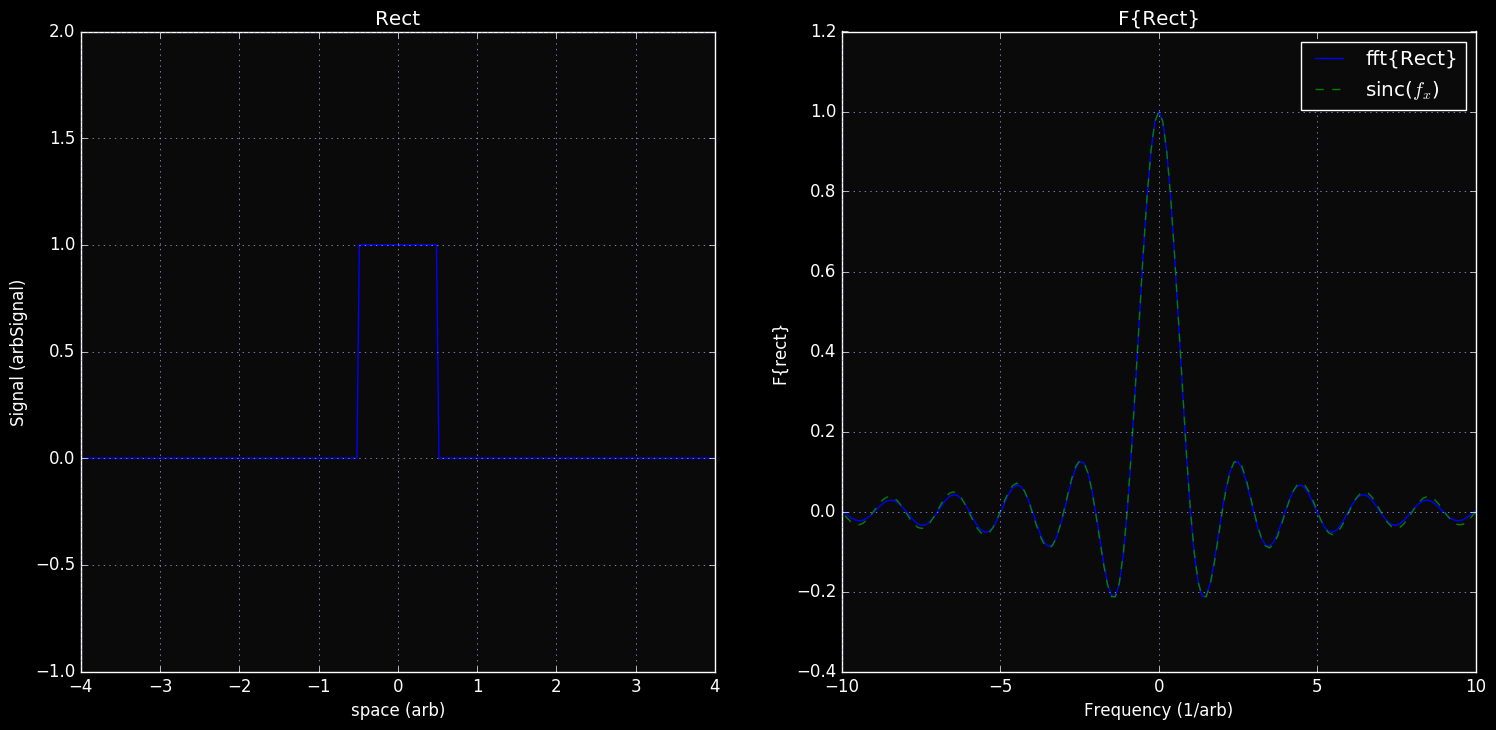

In [82]:
# Plot Data
fig = plt.figure(1)
sp1 = fig.add_subplot(121)
sp1.plot(xData, eField, linestyle='-')
sp1.set_ylim([-1,2])
sp1.set_xlabel('space (arb)')
sp1.set_ylabel('Signal (arbSignal)')
sp1.set_title('Rect')
sp2 = plt.subplot(122)
sp2.plot(fftXData, fftData, linestyle='-', label='fft{Rect}')
sp2.plot(fftXData, np.sinc(fftXData), linestyle='--', label='sinc($f_x$)')
sp2.legend()
sp2.set_xlim(-10,10);
sp2.set_ylabel('F{rect}')
sp2.set_xlabel('Frequency (1/arb)')
sp2.set_title('F{Rect}')
plt.show()

# Problem #2

## Problem Statement

  
Confirm your understanding (and the coordinate system).  You should now have two coordinate arrays x and fx and two E field arrays e and E that are functions of the coordinate arrays.  Execute the following transforms and check your results by over-plotting the continuous transform results.  NOTE:  This is best practice for all following numerical HW problems – if you can solve the problem analytically, then plot the analytic and numerical results on the same graph to validate your code.  Insure the results are accurate at the scale of the sampling grid (that is, if you expect a delta function at x=0, insure it is exactly at x=0) and verify the sign of the phase.  
1. $e(x) = 1$ for all x.  Note and explain the amplitude of the discrete Fourier transform.
- $e(x) = \delta\{x\}$.  Again, comment on the amplitude of the discrete Fourier transform.    
- $E(f_x) = \delta\{f_x - df_x\}$ where dfx is the sample spacing of fx.  Plot and comment on the phase of E(x). 
- $e(x) = \cos{\{\frac{2 \pi x}{\lambda}\}}$ where Lambda is chosen to give you exactly 4 periods across the entire x grid.  Hint: You must choose the number of cells in your grid Nx properly for this constraint to be possible.   The result should be exactly what you would predict from the continuous Fourier transform.
- The same as (d) but let Lambda be increased by a single cell width dx.  
- What do (d) and (e) say about the boundary conditions of the FFT?  What is the mathematical origin of this boundary condition?  What is the boundary condition in frequency space?  How does this relate to the concept of "aliasing?"

## Work

### 1. $e\{x\}=1$

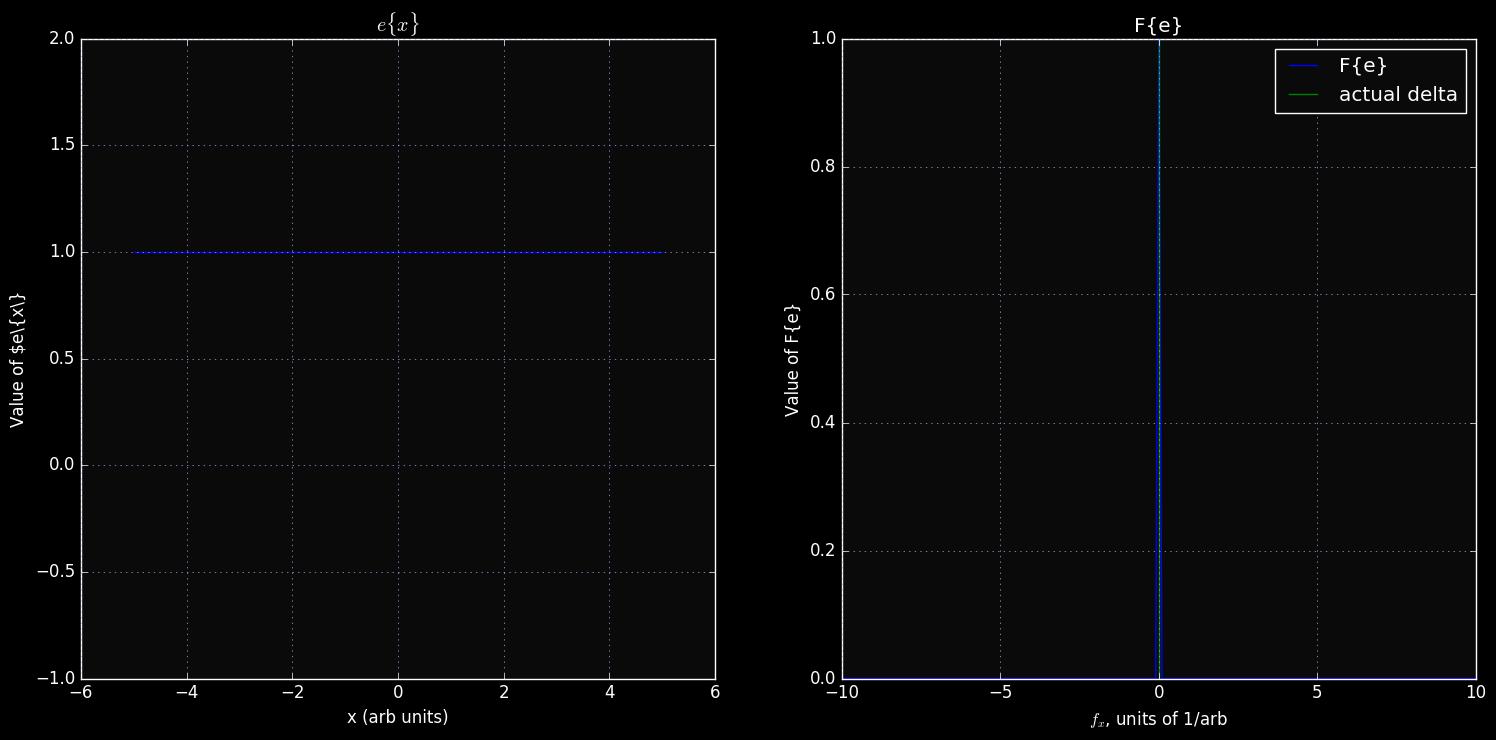

In [49]:
numberOfPoints = 2**8
dataRange = 10
# ###
spacing = dataRange / (numberOfPoints - 1)
xData = np.linspace(-dataRange / 2, dataRange / 2, numberOfPoints)
eField = np.ones(xData.size)
# The normalization by the number of points is to deal with a byproduct of the fft algorithm.
fftData = FT.fftshift((FT.fft(FT.ifftshift(eField)) / numberOfPoints).real)
fftXData = FT.fftshift(FT.fftfreq(numberOfPoints, spacing))
fig = plt.figure(1)
sp1 = fig.add_subplot(121)
sp1.plot(xData, eField, linestyle='-')
sp1.set_ylim([-1,2])
sp1.set_title('$e\{x\}$')
sp1.set_ylabel('Value of $e\{x\}')
sp1.set_xlabel('x (arb units)')
sp2 = plt.subplot(122)
sp2.plot(fftXData, fftData, linestyle='-', label='F{e}')
sp2.set_xlim(-10,10);
sp2.set_xlabel('$f_x$, units of 1/arb')
sp2.set_ylabel('Value of F{e}')
sp2.axvline(0, label='actual delta', color='g')
sp2.set_title('F{e}')
sp2.legend()
plt.show()


### 2. $e\{x\}=\delta\{x\}$

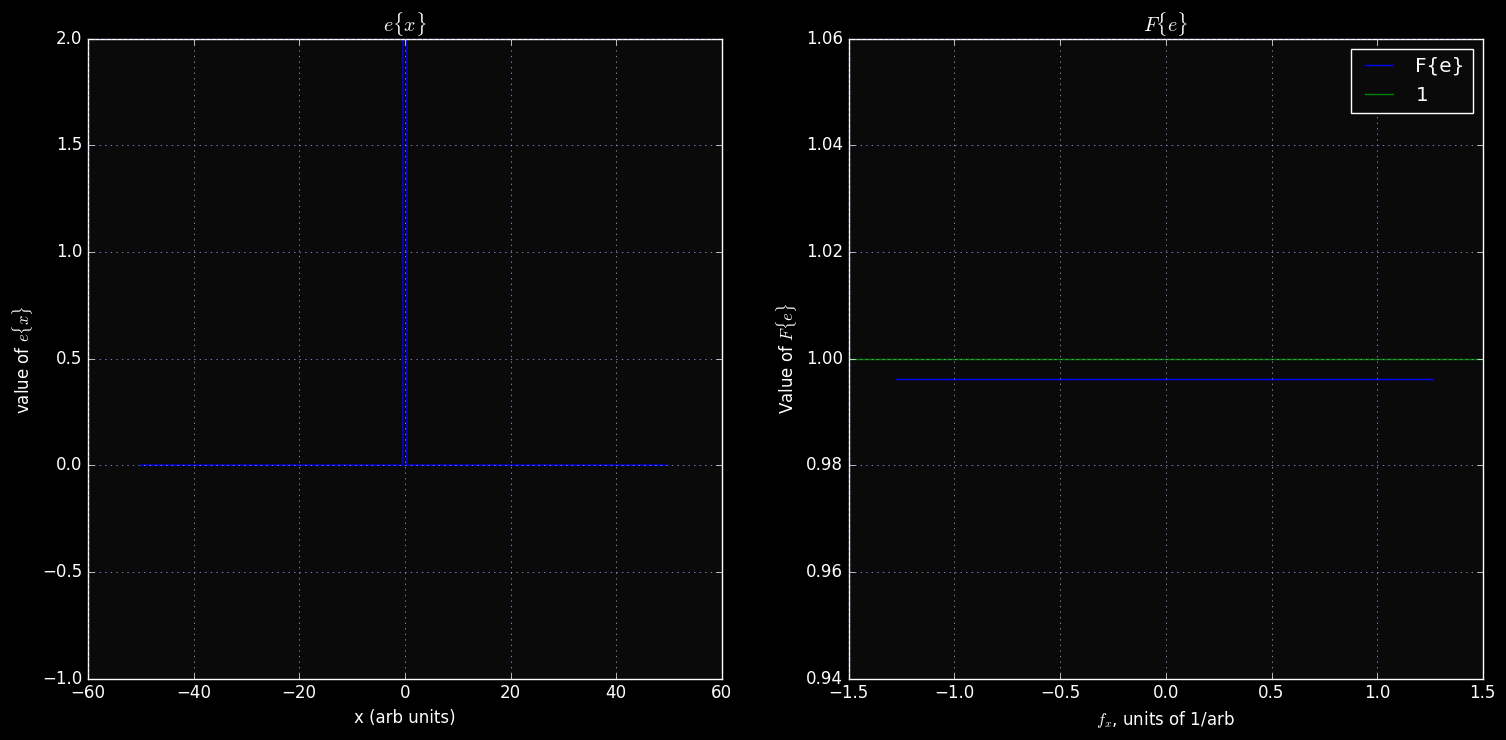

In [52]:
numberOfPoints = 2**8
dataRange = 100
# ###
spacing = dataRange / (numberOfPoints - 1)
xData = np.linspace(-dataRange / 2, dataRange / 2 - spacing, numberOfPoints)
# Not sure why this needs to be dataRange / ... seems like that should already be taken into account.
eField = dataRange / spacing *  np.array([m.isclose(x, 0, abs_tol = 1/(2**8 - 1)) for x in xData])
# The normalization by the number of points is to deal with a byproduct of the fft algorithm.
fftData = FT.fftshift(abs(FT.fft(FT.ifftshift(eField)) / numberOfPoints))
fftXData = FT.fftshift(FT.fftfreq(numberOfPoints, spacing))
fig = plt.figure(1)
sp1 = fig.add_subplot(121)
sp1.plot(xData, eField, linestyle='-')
sp1.set_title('$e\{x\}$')
sp1.set_ylabel('value of $e\{x\}$ ')
sp1.set_xlabel('x (arb units)')
sp1.set_ylim([-1,2])
sp2 = plt.subplot(122)
sp2.plot(fftXData, fftData, linestyle='-', label='F{e}')
sp2.axhline(1, color='g', label='1')
sp2.legend()
sp2.set_xlabel('$f_x$, units of 1/arb')
sp2.set_ylabel('Value of $F\{e\}$')
sp2.set_title('$F\{e\}$')
plt.show()

### 3. $E\{f_x\}=\delta\{f_x-df_x\}$

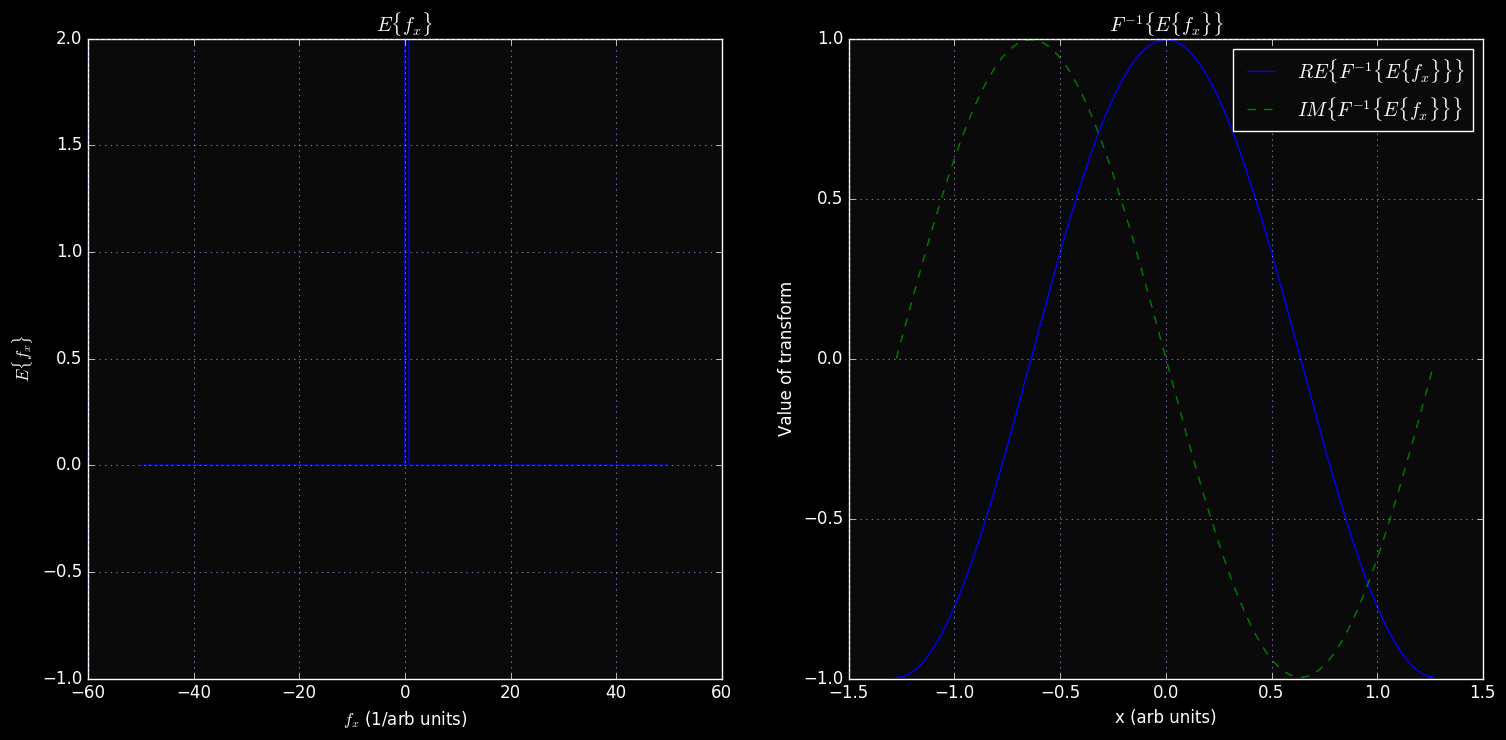

In [80]:
numberOfPoints = 2**8
dataRange = 100
# ###
spacing = dataRange / (numberOfPoints - 1)
xData = np.linspace(-dataRange / 2, dataRange / 2 - spacing, numberOfPoints)
# Not sure why this needs to be dataRange / ... seems like that should already be taken into account.
eField = dataRange / spacing *  np.array([m.isclose(x, spacing, abs_tol = 1/(numberOfPoints - 1)) for x in xData])
#print(eField)
# The normalization by the number of points is to deal with a byproduct of the fft algorithm.
fftData = FT.fftshift(FT.fft(FT.ifftshift(eField)) / numberOfPoints)
fftXData = FT.fftshift(FT.fftfreq(numberOfPoints, spacing))
fig = plt.figure(1)
sp1 = fig.add_subplot(121)
sp1.plot(xData, eField, linestyle='-')
sp1.set_ylim([-1,2])
sp1.set_title('$E\{f_x\}$')
sp1.set_xlabel('$f_x$ (1/arb units)')
sp1.set_ylabel('$E\{f_x\}$')
sp2 = plt.subplot(122)
sp2.plot(fftXData, fftData.real, linestyle='-', label='$RE\{F^{-1}\{E\{f_x\}\}\}$')
sp2.plot(fftXData, fftData.imag, linestyle='--', label='$IM\{F^{-1}\{E\{f_x\}\}\}$')
sp2.legend()
sp2.set_title('$F^{-1}\{E\{f_x\}\}$')
sp2.set_xlabel('x (arb units)')
sp2.set_ylabel('Value of transform')
plt.show()

### 4. $e\{x\}=\cos\{2 \pi x / \lambda\}$

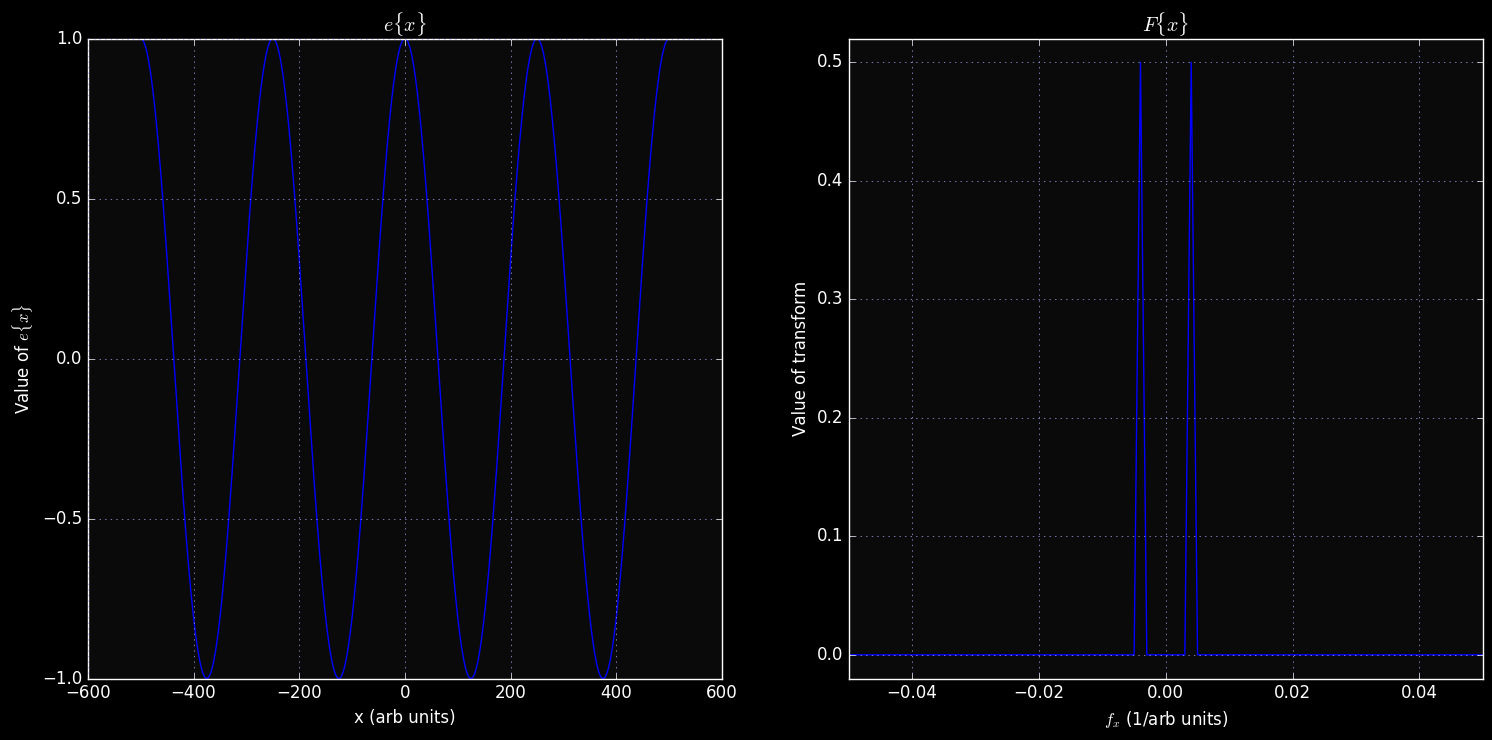

In [83]:
numberOfPoints = 2**16
dataRange = 1000
# ###
spacing = dataRange / (numberOfPoints - 1)
xData = np.linspace(-dataRange / 2, dataRange / 2, numberOfPoints)
# Not sure why this needs to be dataRange / ... seems like that should already be taken into account.
eField = np.cos(2*np.pi*xData/(dataRange/4))
# The normalization by the number of points is to deal with a byproduct of the fft algorithm.
fftData = FT.fftshift((FT.fft(FT.ifftshift(eField)) / numberOfPoints))
fftXData = FT.fftshift(FT.fftfreq(numberOfPoints, spacing))
fig = plt.figure(1)
sp1 = fig.add_subplot(121)
#print(xData, eField)
sp1.plot(xData, eField, linestyle='-')
sp1.set_title('$e\{x\}$')
sp1.set_xlabel('x (arb units)')
sp1.set_ylabel('Value of $e\{x\}$')
sp2 = plt.subplot(122)
#print(fftData)
sp2.plot(fftXData, fftData.real, linestyle='-')
sp2.set_title('$F\{x\}$')
sp2.set_xlabel('$f_x$ (1/arb units)')
sp2.set_ylabel('Value of transform')
sp2.set_ylim(-0.02, 0.52)
sp2.set_xlim(-0.05,0.05);
plt.show()


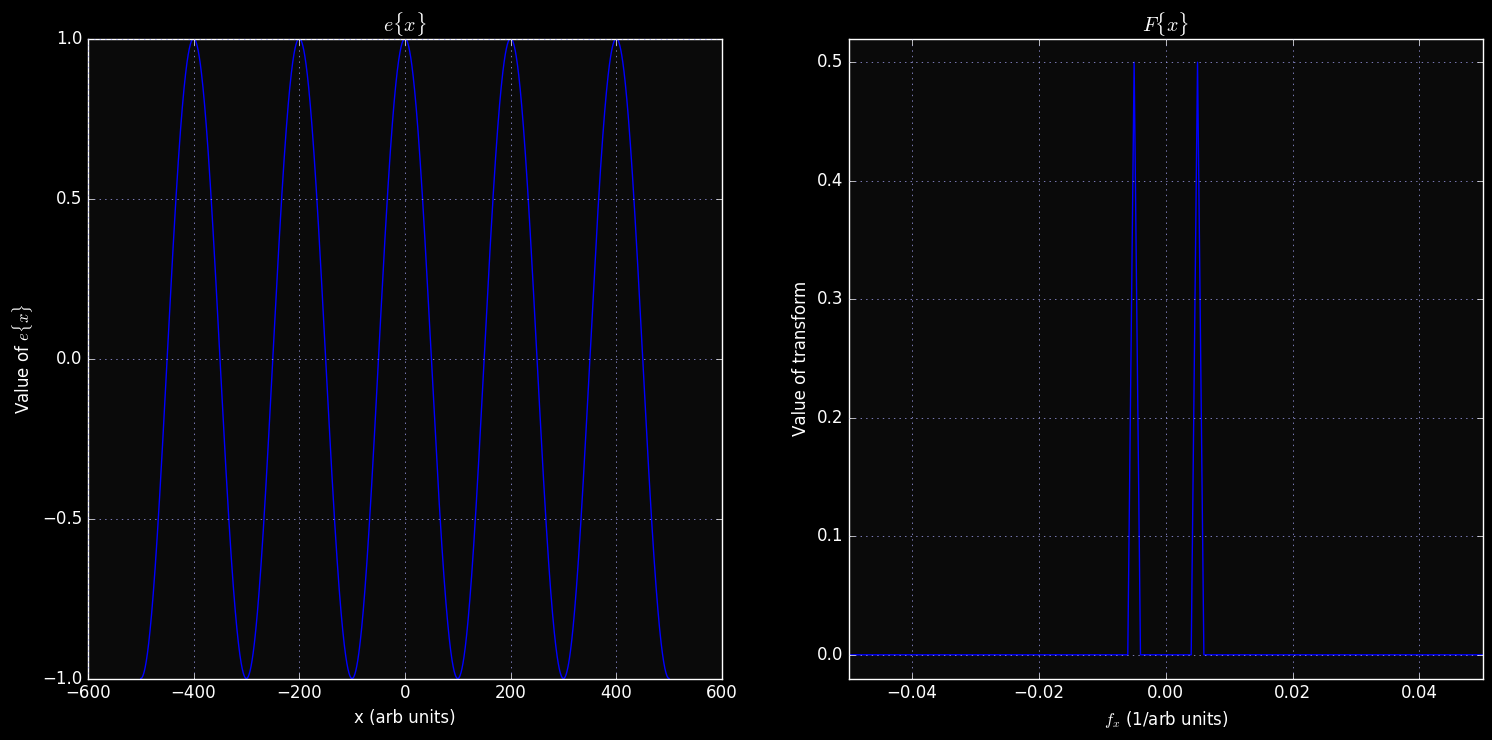

In [85]:
numberOfPoints = 2**16
dataRange = 1000
# ###
spacing = dataRange / (numberOfPoints - 1)
xData = np.linspace(-dataRange / 2, dataRange / 2, numberOfPoints, endpoint=False)
# Not sure why this needs to be dataRange / ... seems like that should already be taken into account.
eField = np.cos(2*np.pi*xData/(dataRange/5))
#print(eField)
# The normalization by the number of points is to deal with a byproduct of the fft algorithm.
fftData = FT.fftshift((FT.fft(FT.ifftshift(eField)) / numberOfPoints))
fftXData = FT.fftshift(FT.fftfreq(numberOfPoints, spacing))
fig = plt.figure(1)
sp1 = fig.add_subplot(121)
sp1.plot(xData, eField, linestyle='-')
sp1.set_title('$e\{x\}$')
sp1.set_xlabel('x (arb units)')
sp1.set_ylabel('Value of $e\{x\}$')
sp2 = plt.subplot(122)
#print(fftData)
sp2.plot(fftXData, fftData.real, linestyle='-')
sp2.set_title('$F\{x\}$')
sp2.set_xlabel('$f_x$ (1/arb units)')
sp2.set_ylabel('Value of transform')
sp2.set_ylim(-0.02, 0.52)
sp2.set_xlim(-0.05,0.05);
plt.show()


# Plotting from Goodmand Problem 2.14

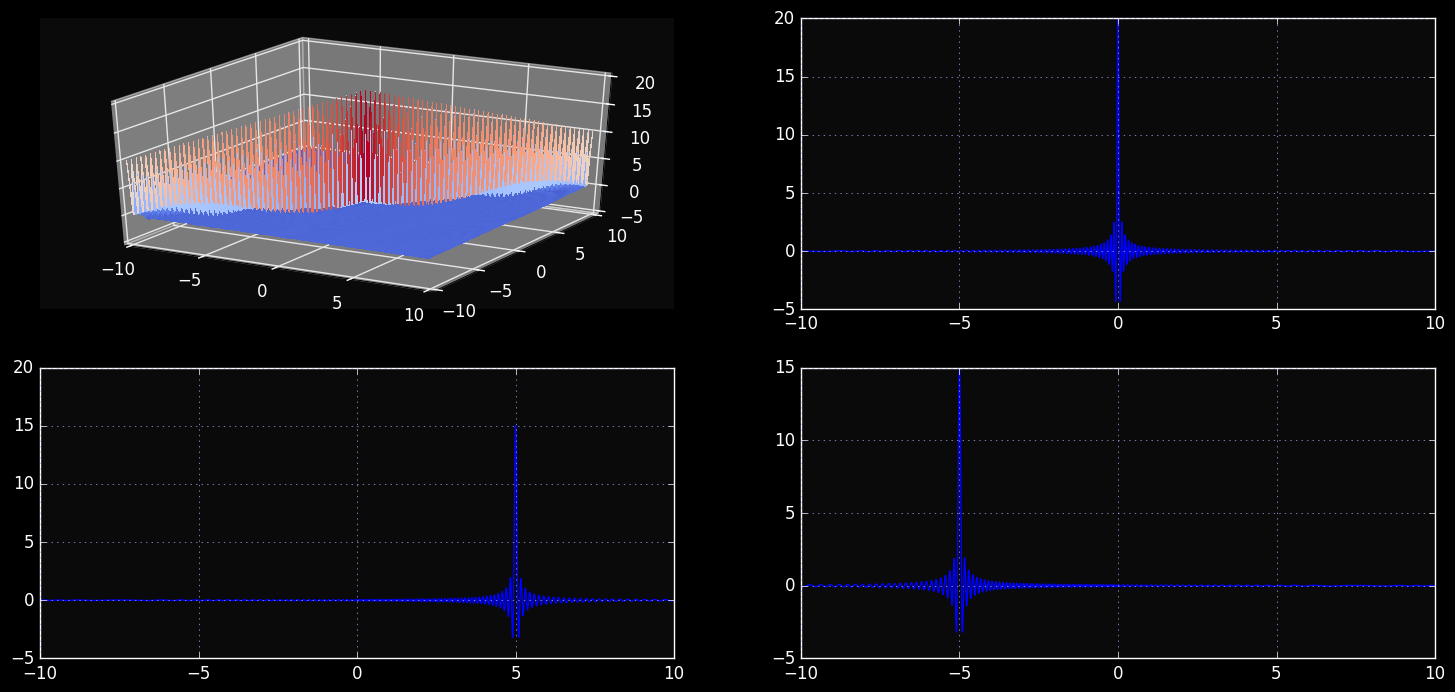

In [22]:
fig = plt.figure()
ax = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(224)
x = np.arange(-10, 10, 0.2)
f = np.arange(-10, 10, 0.2)
X, F = np.meshgrid(x, f)
L = 10
beta = 1
surf = (2*L - abs(X))*np.sinc((2*L - abs(X))*(beta * X - F))
#%matplotlib inline
ax.plot_surface(X, F, surf, rstride=1, cstride=1, cmap=mpl.cm.coolwarm,
                       linewidth=0, antialiased=False)
# slices
f1 = 0
x = np.arange(-10, 10, 0.01)
surf1 = (2*L - abs(x))*np.sinc((2*L - abs(x))*(beta * x - f1))
ax2.plot(x,surf1)
#
f1 = 5
surf1 = (2*L - abs(x))*np.sinc((2*L - abs(x))*(beta * x - f1))
ax3.plot(x,surf1)
#
f1 = -5
surf1 = (2*L - abs(x))*np.sinc((2*L - abs(x))*(beta * x - f1))
ax4.plot(x, surf1)
plt.show()